## 第4讲 基于鲁棒观测器的最优残差生成

### 例2. 连续时间系统的数值仿真

#### 定义系统参数

导入numpy模块

In [1]:
import numpy as np

系统参数矩阵
$$
A = \begin{bmatrix}
0 & 1\\
2 & -1
\end{bmatrix}, 
B = \begin{bmatrix}
 0 \\
 1
\end{bmatrix},
C = \begin{bmatrix}
1 & 0
\end{bmatrix}
$$

In [2]:
A = np.array([[0,1],
              [2,-1]])
B = np.array([[0],[1]])
C = np.array([[1,0]])

#### 设置仿真时间

In [3]:
t_max = 20
dt = 0.01
tspan = np.arange(0, t_max, dt) 
Nk = len(tspan)

#### 预定义数据存储数组

In [4]:
x = np.zeros((2,Nk))
u = np.zeros((1,Nk))
y = np.zeros((1,Nk))

#### 变量初始化 
变量初值
$$ 
x(0) = \begin{bmatrix} 
0 \\
0.1
\end{bmatrix} , y(0) = Cx(0), u(0) = 1 
$$

In [5]:
x[:,[0]] = np.array([[0],[0.1]]) 
y[:,[0]] = C@x[:,[0]]
u[:,[0]] = 1 

#### 进行数值仿真 
动态系统模型
$$
\left\{
\begin{array}{l}
\dot{x}(t) = Ax(t) + Bu(t) \\
y(t) = Cx(t)
\end{array}
\right.
$$

In [6]:
for k in range(1,Nk):
    u[:,[k-1]] = -3*y[:,[k-1]] + 1
    dx = A@x[:,[k-1]] + B@u[:,[k-1]]
    x[:,[k]] = x[:,[k-1]] + dx*dt
    y[:,[k]] = C@x[:,[k]]

#### 画图

In [7]:
# 导入matplotlib模块中的pyplot函数
import matplotlib.pyplot as plt

画状态x的曲线

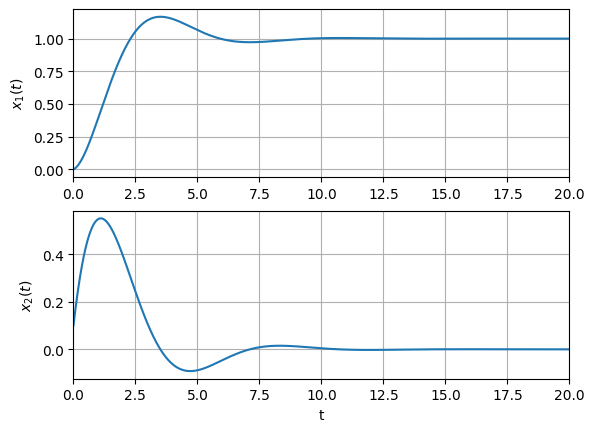

In [8]:
plt.figure()
plt.subplot(211)
plt.plot(tspan,x[[0],:].T)
plt.xlim([0,t_max])
plt.ylabel('$x_1(t)$')
plt.grid()
plt.subplot(212)
plt.plot(tspan,x[[1],:].T)
plt.xlim([0,t_max])
plt.xlabel('t')
plt.ylabel('$x_2(t)$')
plt.grid()
# plt.savefig("Fig1.png", dpi=300)
plt.show()

画输出y的曲线

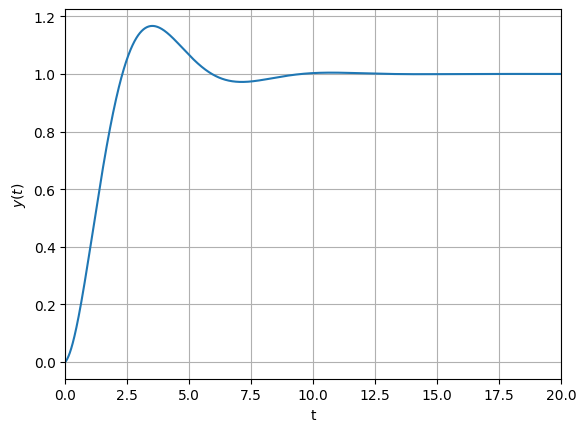

In [9]:
plt.figure()
plt.plot(tspan,y[[0],:].T)
plt.xlim([0,t_max])
plt.xlabel('t')
plt.ylabel('$y(t)$')
plt.grid()
# plt.savefig("Fig2.png", dpi=300)
plt.show()